# FORESEE - ALP-W - Sytematics

### Load Libraries 

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import sys
import os
import math
import matplotlib
from matplotlib import pyplot as plt
#src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

## 1. Specifying the Model 

Let us specify again the model. But this time 
- we add copies of ch channel with dfferent `n_sample` to test the `n_sample` dependence. 
- we add additional copies of each channel, so that we can infer MC statistical uncertainties. 

Note that we choose the `label` accordingly. 

In [17]:
nsamples = [1,3,10,30,100,300,1000]
ncopies = 5

# nsamples = [1,3]
# ncopies = 2

generators = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET']
generators_B = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']

In [18]:
# initialize
energy = "13.6"
modelname="ALP-W"
model = Model(modelname, path="./")

# ad production channels
for nsample in nsamples:
    for ncopy in range(ncopies):
        model.add_production_2bodydecay(
            label = "130_"+str(nsample)+"_"+str(ncopy),
            pid0 = "130",
            pid1 = "111",
            br = "4.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
            generator = generators,
            energy = energy,
            nsample = nsample
        )
        model.add_production_2bodydecay(
            label = "321_"+str(nsample)+"_"+str(ncopy),
            pid0 = "321",
            pid1 = "211",
            br = "10.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
            generator = generators,
            energy = energy,
            nsample = nsample, 
        )
        model.add_production_2bodydecay(
            label = "-321_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-321",
            pid1 = "211",
            br = "10.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
            generator = generators,
            energy = energy,
            nsample = nsample, 
        ) 
        
######################        
        model.add_production_2bodydecay(
            label = "511_"+str(nsample)+"_"+str(ncopy),
            pid0 = "511",
            pid1 = "130",
            br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 
        
        model.add_production_2bodydecay(
            label = "-511_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-511",
            pid1 = "130",
            br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 

        model.add_production_2bodydecay(
            label = "521_"+str(nsample)+"_"+str(ncopy),
            pid0 = "521",
            pid1 = "321",
            br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 
        
        model.add_production_2bodydecay(
            label = "-521_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-521",
            pid1 = "-321",
            br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        )        

        model.add_production_2bodydecay(
            label = "531_"+str(nsample)+"_"+str(ncopy),
            pid0 = "531",
            pid1 = "333",
            br = "2.3e4 * coupling**2 * (1-(mass/5.366)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 
        
        model.add_production_2bodydecay(
            label = "-531_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-531",
            pid1 = "333",
            br = "2.3e4 * coupling**2 * (1-(mass/5.366)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        )   

        model.add_production_2bodydecay(
            label = "541_"+str(nsample)+"_"+str(ncopy),
            pid0 = "541",
            pid1 = "431",
            br = "2.3e4 * coupling**2 * (1-(mass/6.274)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 
        
        model.add_production_2bodydecay(
            label = "-541_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-541",
            pid1 = "-431",
            br = "2.3e4 * coupling**2 * (1-(mass/6.274)**2)**2",
            generator = generators_B,
            energy = energy,
            nsample = nsample, 
        ) 
        
######################  

# add  ctau and BR
model.set_ctau_1d(filename="model/ctau.txt")
branchings = [
    ["gamma_gamma", "black", "solid", r"$\gamma\gamma$", 0.1, 0.3],
    ["e_e_gamma", "blue", "solid", r"$ee\gamma$", 0.1, 0.02],
]
finalstates=[
    [22,22], [11,-11,22]
]
model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=finalstates,
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

# finish
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

# Let's also define the detector 
distance, selection, length, luminosity = 476, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 3.5, 60
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity)

## 2. Generate LLP Spectra

Now let's specify the benchmark mass, in this case $m_{A'}=300$ MeV, and produce the corresponding fluxes. 

In [19]:
mass=0.3
plot = foresee.get_llp_spectrum(mass=mass, coupling=1)

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:491: RuntimeWarning: overflow encountered in exp
  if (theta < 0.017/ltas): probability = 1.- np.exp(- ltan/dbarz)
/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:685: RuntimeWarning: invalid value encountered in multiply
  w_decays = np.array([self.get_decay_prob(pid0, p_mother)*w_mother for w_mother, p_mother in zip(weights_mother,momenta_mother)])


save data to file: ./model/LLP_spectra/13.6TeV_130_1_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1_0_QGSJET_m_0.3.npy


/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:496: RuntimeWarning: overflow encountered in exp
  if (theta < 0.05/ltas): probability = 1.- np.exp(- ltas/dbarz)


save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_1_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_1_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model

save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_3_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_3_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_1_3_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_1_3_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_1_3_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_1_3_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_1_3_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_1_3_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_1_3_NLO-P8-Min_m_0.3.npy
save data to file: ./mo

save data to file: ./model/LLP_spectra/13.6TeV_511_3_1_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_3_1_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_3_1_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_3_1_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_3_1_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_1_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_1_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_1_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_1_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_1_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_1_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_3_1_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_3_1_NLO-P8-Max_m_0.3.npy
save data to file: ./m

save data to file: ./model/LLP_spectra/13.6TeV_-511_3_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_3_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_3_4_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_3_4_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_3_4_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_3_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_3_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_3_4_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_3_4_NLO-P8_m_0.3.npy
save data to file: ./mode

save data to file: ./model/LLP_spectra/13.6TeV_-511_10_2_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_10_2_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_10_2_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_10_2_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_10_2_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_10_2_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_10_2_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_10_2_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_10_2_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_10_2_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_10_2_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_10_2_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_10_2_NLO-P8-Max_m_0.3.npy
save dat

save data to file: ./model/LLP_spectra/13.6TeV_521_30_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_30_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_30_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_30_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_30_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_30_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_30_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_30_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_531_30_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_30_0_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_30_0_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-531_30_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_541_30_0_NLO-P8_m_0.3.npy
save data to 

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:685: RuntimeWarning: overflow encountered in multiply
  w_decays = np.array([self.get_decay_prob(pid0, p_mother)*w_mother for w_mother, p_mother in zip(weights_mother,momenta_mother)])


save data to file: ./model/LLP_spectra/13.6TeV_130_30_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_30_2_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_30_2_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_30_2_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_30_2_NLO-P8_m_0.3.npy
save data to file

save data to file: ./model/LLP_spectra/13.6TeV_130_100_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_0_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_0_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_0_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_0_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_0_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_0_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_100_0_NLO-P8_m_0.3.npy
save

save data to file: ./model/LLP_spectra/13.6TeV_130_100_3_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_3_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_3_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_100_3_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_3_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_3_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_3_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_3_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_100_3_NLO-P8_m_0.3.npy
save

save data to file: ./model/LLP_spectra/13.6TeV_-541_300_0_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_1_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_1_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_1_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_1_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_1_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_1_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_1_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_1_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_1_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_1_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_1_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_1_QGSJET_m_0.3.npy

save data to file: ./model/LLP_spectra/13.6TeV_-541_300_3_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_4_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_4_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_4_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_300_4_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_4_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_4_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_4_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_300_4_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_4_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_4_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_4_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_300_4_QGSJET_m_0.3.npy

save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_1_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_1_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_1_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1000_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1000_2_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1000_2_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_1000_2_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_2_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_2_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_2_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_2_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_2_

save data to file: ./model/LLP_spectra/13.6TeV_541_1000_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_541_1000_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_541_1000_4_NLO-P8-Min_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_4_NLO-P8_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_4_NLO-P8-Max_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_-541_1000_4_NLO-P8-Min_m_0.3.npy


## 3. Dependence on `n_sample` for B hadrons

Let's first study the dependence of the event rate as a function of `n_sample`.  We do this for different value of `couplings`. 

In [20]:
# define couplings 
couplings= [1e-5, 1e-4]

# initiate summary dict
summary = {}

# get numbers
for nsample in nsamples:
    summary[nsample] = {}
    for ncopy in range(ncopies):
        summary[nsample][ncopy] = {}
        #modes = {"130_"+str(nsample)+"_"+str(ncopy):generators, "321_"+str(nsample)+"_"+str(ncopy):generators, "-321_"+str(nsample)+"_"+str(ncopy):generators}
        modes={"511_"+str(nsample)+"_"+str(ncopy):generators_B, "-511_"+str(nsample)+"_"+str(ncopy):generators_B,
              "521_"+str(nsample)+"_"+str(ncopy):generators_B, "-521_"+str(nsample)+"_"+str(ncopy):generators_B,
               "531_"+str(nsample)+"_"+str(ncopy):generators_B, "-531_"+str(nsample)+"_"+str(ncopy):generators_B,
               "541_"+str(nsample)+"_"+str(ncopy):generators_B, "-541_"+str(nsample)+"_"+str(ncopy):generators_B
              }
        output = foresee.get_events(mass=mass, energy=energy, couplings=couplings, modes=modes, nsample=30)
        coups, _, nsignals, _, _ = output
        for coup, nsignal in zip(coups,nsignals):
            summary[nsample][ncopy][coup] = {}
            for igen,generator in enumerate(generators_B): 
                summary[nsample][ncopy][coup][generator] = nsignal[igen]

And now we can plot everything

In [32]:
def plot_nsample(summary, mass, coupling, nsamples, generators, ncopies, filename=None):

    # intiate plot
    matplotlib.rcParams.update({'font.size': 15})
    fig = plt.figure(figsize=(7,5))
    ax = plt.subplot()
    
    # add data  
    for generator in generators:
        avgs, mins, maxs = [],[],[]
        for nsample in nsamples:
            values = [summary[nsample][ncopy][coupling][generator] for ncopy in range (ncopies)]
            avg = np.mean(values)
            std = np.std(values)
            avgs.append(avg)
            mins.append(avg-std)
            maxs.append(avg+std)
        ax.fill_between(nsamples, mins, maxs, alpha=0.3, label=generator)
        ax.plot(nsamples, avgs) 
    
    # get coupling
    exponent = int(math.floor(np.log10(abs(coupling))))
    prefactor = round(coupling*10**(-exponent),3)
    
    # finalize
    ax.set_xscale("log")
    ax.set_title(r"m="+str(mass)+"GeV, $g_{aW}$="+str(int(prefactor))+"$\cdot 10^{"+str(exponent)+"}$, only from B hadrons")
    ax.set_xlabel("nsample in production") 
    ax.set_ylabel("number of decays in FASER") 
    ax.legend(frameon=False, labelspacing=0)
    fig.subplots_adjust(left=0.12, right=0.975, bottom=0.12, top=0.93 )
    if filename is not None: plt.savefig(filename)
    plt.show()

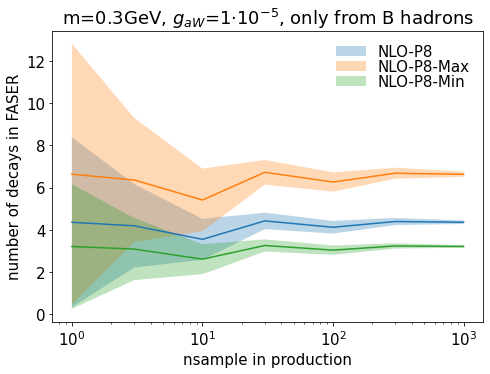

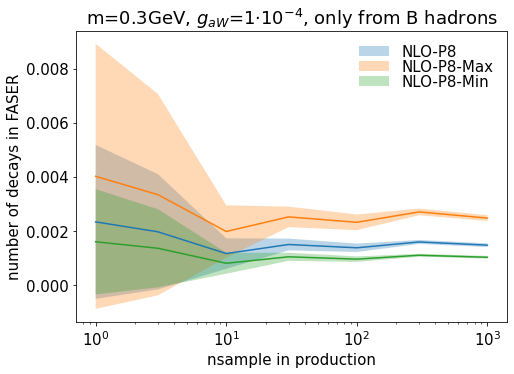

In [33]:
for coupling in couplings: 
    filename = "figures/"+modelname+"_B_nsample_"+str(mass)+"_"+str(coupling)+".pdf"
    plot_nsample(summary, mass, coupling, nsamples, generators_B, ncopies, filename=filename)

## 4. Energy Distribution - B hadrons

Let's now make a plot of the energy distribution. 

In [25]:
# define couplings and nsample to use
couplings= [1e-5, 1e-4]
nsample_use = 100

# initiate summary dict
distributions = {}
edges = np.logspace( 2,  4, num=20+1)
centers = np.logspace( 2.05,  3.95, num=20)

# get numbers
for ncopy in range(ncopies):
    distributions[ncopy] = {}
    #modes = {"111_"+str(nsample_use)+"_"+str(ncopy):generators, "221_"+str(nsample_use)+"_"+str(ncopy):generators}
    modes={"511_"+str(nsample)+"_"+str(ncopy):generators_B, "-511_"+str(nsample)+"_"+str(ncopy):generators_B,
         "521_"+str(nsample)+"_"+str(ncopy):generators_B, "-521_"+str(nsample)+"_"+str(ncopy):generators_B,
         "531_"+str(nsample)+"_"+str(ncopy):generators_B, "-531_"+str(nsample)+"_"+str(ncopy):generators_B,
        "541_"+str(nsample)+"_"+str(ncopy):generators_B, "-541_"+str(nsample)+"_"+str(ncopy):generators_B
        }
    output = foresee.get_events(mass=mass, energy=energy, couplings=couplings, modes=modes, nsample=30)
    coups, _, _, momenta, weights = output
    for coup, momentum, weight in zip(couplings, momenta, weights):
        distributions[ncopy][coup] = {}
        data = [p.e for p in momentum]
        for igen, generator in enumerate(generators_B): 
            wgts, _ = np.histogram(data, weights=weight.T[igen], bins=edges)
            distributions[ncopy][coup][generator] = wgts

And now we can plot everything

In [30]:
def plot_energy(distributions, mass, coupling, generators, ncopies, logratio=False, filename=None):

    # initialize
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 14})
    ax1 = fig.add_axes([0.13, 0.40, 0.82, 0.55], xticklabels=[], )
    ax2 = fig.add_axes([0.13, 0.09, 0.82, 0.31],  )
    bins, xvals = np.logspace( 2,  4, num=20+1), np.logspace( 2.05,  3.95, num=20)    
    lines, maxval = {}, 0

    # add data
    maxval,baseline = 0, []
    for igen, generator in enumerate(generators):
        values = np.array([distributions[ncopy][coupling][generator] for ncopy in range (ncopies)]).T
        avg, std = np.array([np.mean(x) for x in values]), np.array([np.std(x) for x in values])
        if igen==0: baseline= avg
        ax1.fill_between(bins[:-1], avg+std, avg-std, step='post', alpha=0.3, label=generator)
        ax1.plot(bins[:-1], avg, drawstyle='steps-post') 
        
        ratio0 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg    , baseline)]
        ratio1 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg+std, baseline)]
        ratio2 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg-std, baseline)]
        ax2.plot(bins[:-1], ratio0, drawstyle='steps-post') 
        ax2.fill_between(bins[:-1], ratio1, ratio2, step='post', alpha=0.3)
        if max(avg+std)>maxval: maxval=max(avg+std) 
        
    # get coupling
    exponent = int(math.floor(np.log10(abs(coupling))))
    prefactor = round(coupling*10**(-exponent),3)
    
    # finalize
    ax1.set_xscale("log")
    ax2.set_xscale("log")
    ax1.set_xlim(1e2, 1e4)
    ax2.set_xlim(1e2, 1e4)
    ax1.set_ylim(0, 1.1*maxval)
    ax1.set_title(r"m="+str(mass)+"GeV, $g_{aW}$="+str(int(prefactor))+"$\cdot 10^{"+str(exponent)+"}$,Only from B hadrons")
    ax2.set_xlabel(r"Energy $E$ [GeV]") 
    ax1.set_ylabel("Number of Decays per Bin") 
    ax2.set_ylabel("Relative to Baseline") 
    ax1.set_xticklabels([])
    if logratio: 
        ax2.set_yscale("log")
        ax2.set_ylim(0.25, 4.)
        ax2.set_yticks([0.33, 0.5, 1, 2, 3])
        ax2.set_yticklabels(["0.33","0.5","1","2","3"])
    else: 
        ax2.set_ylim(0,1.99)   
        
    #legend
    emean = sum([e*n for e,n in zip(bins, baseline)])/sum(baseline)
    if emean>1000: ax1.legend(frameon=False, labelspacing=0, loc="upper left")
    else: ax1.legend(frameon=False, labelspacing=0, loc="upper right")

    #save
    #fig.subplots_adjust(wspace=0, hspace=0, left=0.07, right=0.975, bottom=0.07, top=0.95 )
    if filename is not None: plt.savefig(filename)
    plt.show()

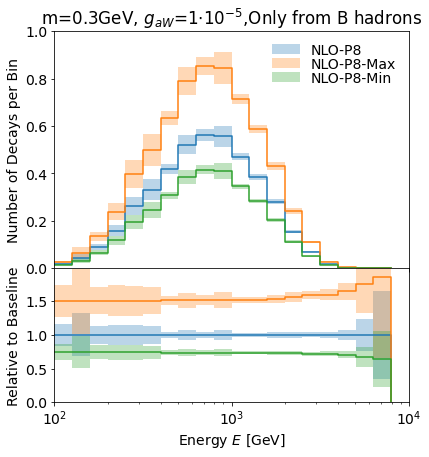

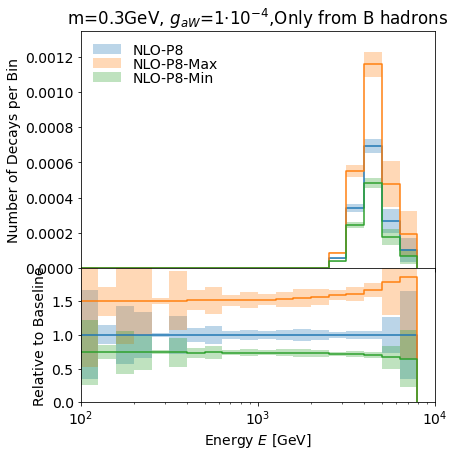

In [31]:
for coupling in couplings: 
    filename = "figures/"+modelname+"_B_Energy_"+str(mass)+"_"+str(coupling)+".pdf"
    plot_energy(distributions, mass, coupling, generators_B, ncopies, filename=filename)